In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
# create population density and covid case dataframes by county to merge
pop_df = pd.read_excel('county_populations.xlsm')
county_df = pd.read_csv('us-counties.csv')
density_df = pd.read_excel('Population_Density.xlsm')

In [3]:
# pop_df = pop_df.set_index('FIPS Code')
pop_df
county_df
# county_df.fips = county_df.fips.astype(int)
# density_df
county_df = county_df.dropna()
county_df
county_df.fips = county_df.fips.astype(int)
county_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
72983,2020-04-19,Sublette,Wyoming,56035,1,0
72984,2020-04-19,Sweetwater,Wyoming,56037,10,0
72985,2020-04-19,Teton,Wyoming,56039,62,0
72986,2020-04-19,Uinta,Wyoming,56041,6,0


In [5]:
county_df = county_df.set_index('fips')
density_df = density_df.set_index('FIPS Code')
pop_df = pop_df.set_index('FIPS Code')

density_df
county_df
pop_df

KeyError: "None of ['fips'] are in the columns"

In [6]:
county_df
density_df
pop_df

,State,area,Population,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,2018
FIPS Code,,,,,,,,,,,,,,,,,,,,,
100124,Alabama,Abbeville city,2563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2563.0
100460,Alabama,Adamsville city,4325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4325.0
100484,Alabama,Addison town,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,724.0
100676,Alabama,Akron town,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0
1,Alabama,Alabama (state totals),4887871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4887871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683040,Wyoming,Wheatland town,3553.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3553.0
5684925,Wyoming,Worland city,5075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5075.0
5685015,Wyoming,Wright town,1733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1733.0


In [11]:
meta_df = density_df.join(county_df, how = 'inner')
meta_df = meta_df.drop_duplicates(['county'], keep = 'last')
meta_df
pop_df.drop(['State'], axis=1, inplace=True)
# meta_df.drop([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,2014,2015,2016,2017,2018], axis = 1, inplace = True)

In [12]:


agg_df = meta_df.join(pop_df, how = 'inner')
# meta_df.drop_duplicates(['county'], keep = "last")



In [13]:
agg_df['casesPerCapita'] = agg_df['cases'] / agg_df[2018]

agg_df['casesPerCapita'] = agg_df['casesPerCapita']

In [14]:
agg_df[agg_df['casesPerCapita'] == max(agg_df['casesPerCapita'])]

,State,Area,Units,2019,date,county,state,cases,deaths,area,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,2018,casesPerCapita
36087,New York,Rockland County,Persons per square mile,1877.85401,2020-04-19,Rockland,New York,9364,276,Rockland County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325695.0,0.028751


In [57]:
agg_df.sort_values(['casesPerCapita'], ascending = False).head()

,State,Area,Units,2019,date,county,state,cases,deaths,area,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,2018,casesPerCapita
36087,New York,Rockland County,Persons per square mile,1877.85401,2020-04-19,Rockland,New York,9364,276,Rockland County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325695.0,0.028751
36119,New York,Westchester County,Persons per square mile,2247.17713,2020-04-19,Westchester,New York,23803,831,Westchester County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,967612.0,0.024600
36059,New York,Nassau County,Persons per square mile,4772.31142,2020-04-19,Nassau,New York,30013,1577,Nassau County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1358343.0,0.022095
16013,Idaho,Blaine County,Persons per square mile,8.56832,2020-04-19,Blaine,Idaho,470,5,Blaine County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22601.0,0.020796
36103,New York,Suffolk County,Persons per square mile,1624.34389,2020-04-19,Suffolk,New York,26888,845,Suffolk County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1481093.0,0.018154


In [15]:
density_list = agg_df[2019]
ratio_list = agg_df['casesPerCapita']

In [22]:
correlation = stats.pearsonr(density_list,ratio_list)

correlation

def regress(x_values,y_values):
    corr = stats.pearsonr(x_values,y_values)
    print(f'The correlation coefficient is {round(corr[0],2)}')
    print(f'The P Value is {corr[1]}')
    x_series = pd.Series(x_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_series * slope + intercept
    plt.plot(x_values, regress_values, 'r-')

The correlation coefficient is 0.25
The P Value is 2.618398591890597e-25


Text(0.5, 1.0, 'Population Density vs. Covid Cases Per Capita for U.S. Counties')

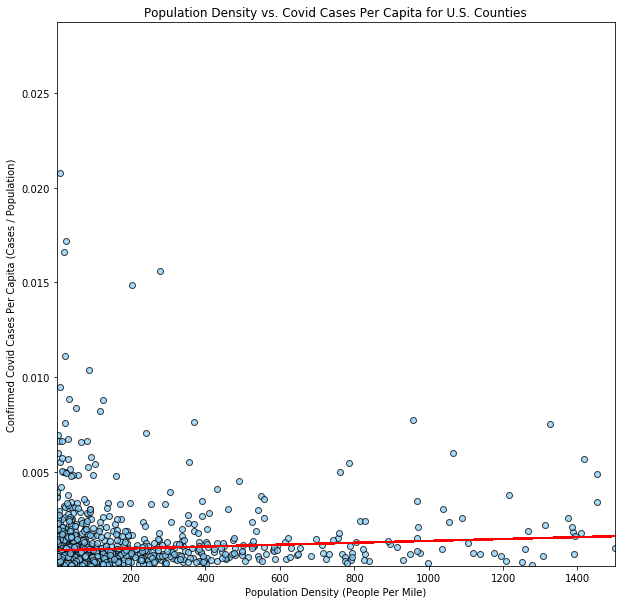

In [23]:
plt.figure(figsize=(10,10))
regress(density_list,ratio_list)
plt.scatter(density_list, ratio_list, marker="o", facecolors="lightskyblue", edgecolors="black",
            alpha=.75)

plt.xlim((min(density_list), 1500))
plt.ylim((min(ratio_list), max(ratio_list)))
plt.xlabel('Population Density (People Per Mile)')
plt.ylabel('Confirmed Covid Cases Per Capita (Cases / Population)')
plt.title('Population Density vs. Covid Cases Per Capita for U.S. Counties')

In [40]:
agg_filter = agg_df[agg_df['casesPerCapita'] > .005]

In [41]:
density_list2 = agg_filter[2019]
ratio_list2 = agg_filter['casesPerCapita']

In [42]:
correlation = stats.pearsonr(density_list2,ratio_list2)

correlation

(0.22689156103034108, 0.12942917821467065)